<a href="https://colab.research.google.com/github/neuroEngage/ML/blob/main/heart_disease_prediction_using_9_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Prediction Using 9 Models

`Author:` [Fahad Ur Rehman](https://github.com/FahadUrRehman07)\
`Date:` 15.April.2024\
`Dataset:` [Hear Disease UCI](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data)

### `INSPIRATION OF THE PROJECT`
World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using 9 models(`[LOGISTIC REGRESSION,KNN, NB,SVM, Random Forest, Decision Tree, XGBoost, GradientBoosting, AdaBoost]`).




### About Dataset (Meta data)
#### Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

### Content
#### Column Descriptions:
* `id `(Unique id for each patient)
* `age` (Age of the patient in years)
* `origin` (place of study)
* `sex` (Male/Female)
* `cp` chest pain type
  1. typical angina.
  2. atypical angina.
  3. non-anginal.
  4. asymptomatic.
* `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* `chol` (serum cholesterol in mg/dl)
* `fbs` (if fasting blood sugar > 120 mg/dl)
* `restecg` (resting electrocardiographic results)
* `-- Values:` [normal, stt abnormality, lv hypertrophy]
* `thalach:` maximum heart rate achieved
* `exang:` exercise-induced angina (True/ False)
* `oldpeak:` ST depression induced by exercise relative to rest
* `slope:` the slope of the peak exercise ST segment
* `ca:` number of major vessels (0-3) colored by fluoroscopy
* `thal:`[normal; fixed defect; reversible defect]
* `num:` the predicted attribute

### Acknowledgements
#### Creators:
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

#### Relevant Papers:
* Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
* David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
* Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.

#### Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution.

**They would be:**
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

# Aims & Objectives
* we will fill this after some exploratory data analysis

# Import Libraries
lets start the project by importing all the libraries that we will need in the project.

In [1]:
# import libraries

# 1. to handle the data
import pandas as pd
import numpy as np

# 2. To Viusalize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer
from matplotlib.colors import ListedColormap

# 3. To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer

# 4. import Iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# 5. Machine Learning
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score

# 6. For Classification task.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier,RandomForestRegressor
from xgboost import XGBClassifier

# 7. Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 8. Ignore warnings
import warnings
warnings.filterwarnings('ignore')


# Load the Dataset

In [2]:

df = pd.read_csv("/content/heart_disease_uci.csv")

# print the first 5 rows of the dataframe
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# Exploratory Data Analysis (EDA)
### Explore Each Column

In [3]:
# Exploring the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [4]:
# Checking the data shape
df.shape

(920, 16)

In [5]:
# Id column
df['id'].min(), df['id'].max()

(1, 920)

In [6]:
# age column
df['age'].min(), df['age'].max()

(28, 77)

## Visualizations

In [7]:
# lets summerize the age column
df['age'].describe()

,age
count,920.000000
mean,53.510870
std,9.424685
min,28.000000
25%,47.000000
50%,54.000000
75%,60.000000
max,77.000000


NO missing values in the column so we are good to go...

<Axes: xlabel='age', ylabel='Count'>

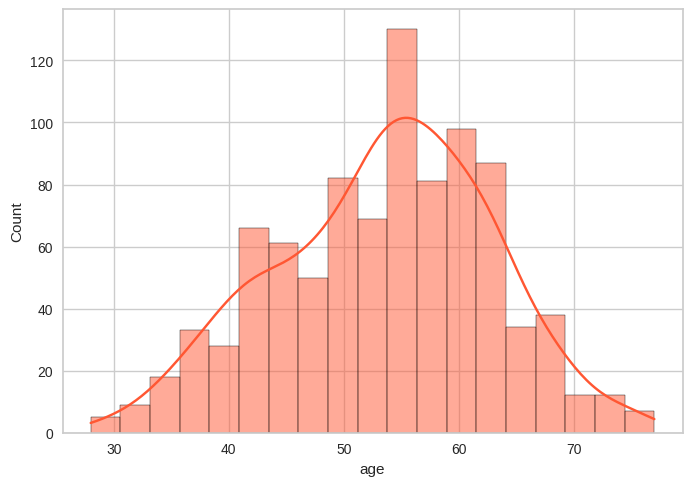

In [8]:
import seaborn as sns

# Define custom colors
custom_colors = ["#FF5733", "#3366FF", "#33FF57"]  # Example colors, you can adjust as needed

# Plot the histogram with custom colors
sns.histplot(df['age'], kde=True, color="#FF5733", palette=custom_colors)


The age column distribution seems to be normaly distributed because we can clearly see the bill curve.

Mean 53.51086956521739
Median 54.0
Mode 0    54
Name: age, dtype: int64


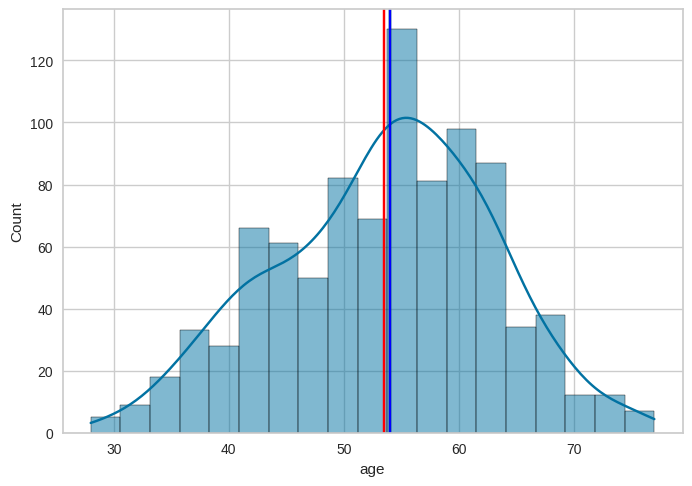

In [9]:
# Plot the mean, Median and mode of age column using sns
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='Red')
plt.axvline(df['age'].median(), color= 'Green')
plt.axvline(df['age'].mode()[0], color='Blue')

# print the value of mean, median and mode of age column
print('Mean', df['age'].mean())
print('Median', df['age'].median())
print('Mode', df['age'].mode())


Lets explore the gender base distribution of the dataset for age column

In [10]:
# plot the histogram of age column using plotly and coloring this by sex

fig = px.histogram(data_frame=df, x='age', color= 'sex')
fig.show()

In [11]:
# Find the values of sex column
df['sex'].value_counts()

,count
sex,
Male,726
Female,194


In [12]:
# calculating the percentage fo male and female value counts in the data

male_count = 726
female_count = 194

total_count = male_count + female_count

# calculate percentages
male_percentage = (male_count/total_count)*100
female_percentages = (female_count/total_count)*100

# display the results
print(f'Male percentage i the data: {male_percentage:.2f}%')
print(f'Female percentage in the data : {female_percentages:.2f}%')

# Difference
difference_percentage = ((male_count - female_count)/female_count) * 100
print(f'Males are {difference_percentage:.2f}% more than female in the data.')


Male percentage i the data: 78.91%
Female percentage in the data : 21.09%
Males are 274.23% more than female in the data.


In [13]:
726/194

3.7422680412371134

In [14]:
# Find the values count of age column grouping by sex column
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

#### Exploring the dataset column

In [15]:
# find the unique values in the dataset column
df['dataset'].value_counts()

,count
dataset,
Cleveland,304
Hungary,293
VA Long Beach,200
Switzerland,123


In [16]:
# plot the countplot of dataset column
fig =px.bar(df, x='dataset', color='sex')
fig.show()

# print the values of dataset column groupes by sex
print (df.groupby('sex')['dataset'].value_counts())

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64


In [17]:
# make a plot of age column using plotly and coloring by dataset

fig = px.histogram(data_frame=df, x='age', color= 'dataset')
fig.show()

# print the mean median and mode of age column grouped by dataset column
print("___________________________________________________________")
print ("Mean of the dataset: ",df.groupby('dataset')['age'].mean())
print("___________________________________________________________")
print ("Median of the dataset: ",df.groupby('dataset')['age'].median())
print("___________________________________________________________")
print ("Mode of the dataset: ",df.groupby('dataset')['age'].agg(pd.Series.mode))
print("___________________________________________________________")

___________________________________________________________
Mean of the dataset:  dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
___________________________________________________________
Median of the dataset:  dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
___________________________________________________________
Mode of the dataset:  dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object
___________________________________________________________


## Exploring CP (Chest Pain) column

In [18]:
# value count of cp column
df['cp'].value_counts()

,count
cp,
asymptomatic,496
non-anginal,204
atypical angina,174
typical angina,46


<Axes: xlabel='cp', ylabel='count'>

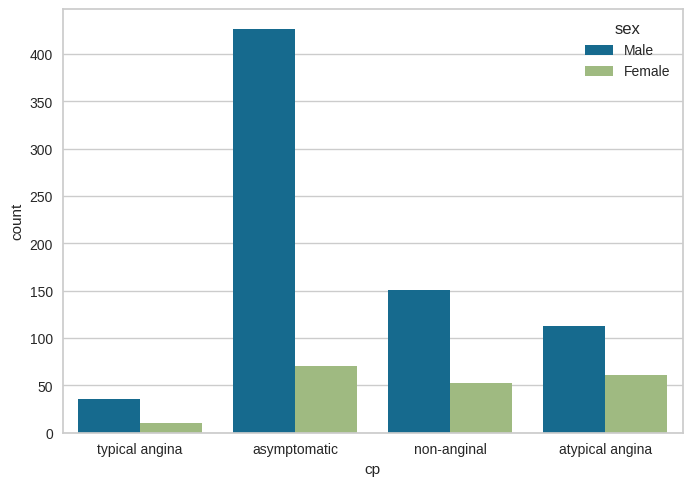

In [19]:
# count plot of cp column by sex column
sns.countplot(df, x='cp', hue= 'sex')

<Axes: xlabel='cp', ylabel='count'>

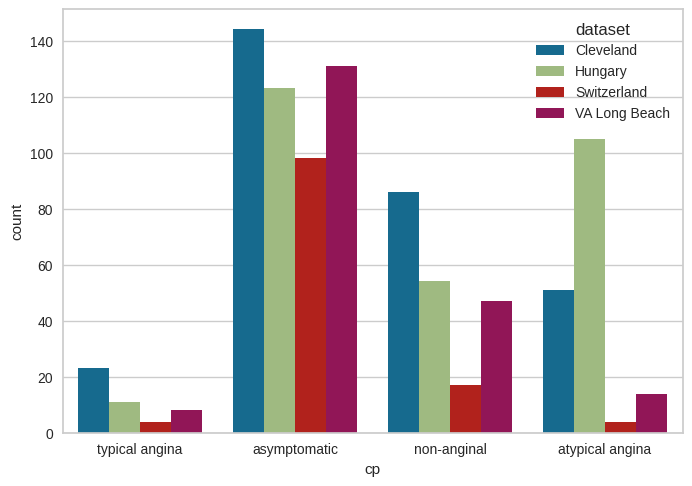

In [20]:
# count plot of cp column by dataset column
sns.countplot(df,x='cp',hue='dataset')

In [21]:
# Draw the plot of age column group by cp column

fig = px.histogram(data_frame=df, x='age', color='cp')
fig.show()

### Let's explore the trestbps (resting blood pressure) column:

The normal resting blood pressure is 120/80 mm Hg.\
`Write here, what will happen if the blood pressure is high or low and then you canbin the data based on the those values.`

In [22]:
# lets summerize the trestbps column
df['trestbps'].describe()

,trestbps
count,861.000000
mean,132.132404
std,19.066070
min,0.000000
25%,120.000000
50%,130.000000
75%,140.000000
max,200.000000


### **Handling missing values in trestbps column**

There are some missing values becuase total values is 920 but here we have 861

In [23]:
# Dealing with Missing values in trestbps column.
# find the percentage of misssing values in trestbps column
print(f"Percentage of missing values in trestbps column: {df['trestbps'].isnull().sum() /len(df) *100:.2f}%")

Percentage of missing values in trestbps column: 6.41%


`Removing missing values using Iterative imputer`

In [24]:
# Impute the missing values of trestbps column using iterative imputer
# create an object of iteratvie imputer
imputer1 = IterativeImputer(max_iter=10, random_state=42)

# Fit the imputer on trestbps column
imputer1.fit(df[['trestbps']])

# Transform the data
df['trestbps'] = imputer1.transform(df[['trestbps']])

# Check the missing values in trestbps column
print(f"Missing values in trestbps column: {df['trestbps'].isnull().sum()}")


Missing values in trestbps column: 0


`Let impute other columns with missing values:`

In [25]:
# First lets see data types or category of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [26]:
# let's see which columns has missing values
(df.isnull().sum()/ len(df)* 100).sort_values(ascending=False)

,0
ca,66.413043
thal,52.826087
slope,33.586957
fbs,9.782609
oldpeak,6.739130
thalch,5.978261
exang,5.978261
chol,3.260870
restecg,0.217391
id,0.000000


`Impute missing values using iterative imputer for selected columns.`

columns are selected based on data types (floating data type)
because imputer only works with the floating data types.

selected columns are:
1. ca.
2. oldpeak
3. thal
4. chol
5. thalch

In [27]:
# create an object of iterative imputer
imputer2 = IterativeImputer(max_iter=10, random_state=42)

# fit transform on ca,oldpeak, thal,chol and thalch columns
df['ca'] = imputer2.fit_transform(df[['ca']])
df['oldpeak']= imputer2.fit_transform(df[['oldpeak']])
df['chol'] = imputer2.fit_transform(df[['chol']])
df['thalch'] = imputer2.fit_transform(df[['thalch']])



In [28]:
# let's check again for missing values
(df.isnull().sum()/ len(df)* 100).sort_values(ascending=False)

,0
thal,52.826087
slope,33.586957
fbs,9.782609
exang,5.978261
restecg,0.217391
id,0.000000
age,0.000000
sex,0.000000
dataset,0.000000
cp,0.000000


##### `***Lets impute the missing values in thal column by using ML models***`
All the coloumns are imputed which has floating data types and now lets impute the columns which has object data type.

* To handle the column having object data type we will use ML models.

In [29]:
print(f"The missing values in thal column are: {df['thal'].isnull().sum()}")


The missing values in thal column are: 486


In [30]:
df['thal'].value_counts()

,count
thal,
normal,196
reversable defect,192
fixed defect,46


In [31]:
df.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.000000,333.0,True,st-t abnormality,154.000000,False,0.000000,NaN,0.676375,NaN,1
916,917,62,Male,VA Long Beach,typical angina,132.132404,139.0,False,st-t abnormality,137.545665,NaN,0.878788,NaN,0.676375,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.000000,223.0,True,st-t abnormality,100.000000,False,0.000000,NaN,0.676375,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,132.132404,385.0,True,lv hypertrophy,137.545665,NaN,0.878788,NaN,0.676375,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.000000,254.0,False,lv hypertrophy,93.000000,True,0.000000,NaN,0.676375,NaN,1



## Dealing with Missing  values (Categorical with Machine learning Models)

### Steps:

1. FInd the collumns with missing values and store in an object
3. FInd the Columns based on data type
    1. Numeric columns.
    2. Categorical Columns.
    3. Boolean.
4. Define the function to impute missing values.
5. Apply the function to our dataset with missing values.
6. Check the missing values after imputation.

In [32]:
# find missing values.
df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False)


,0
thal,486
slope,309
fbs,90
exang,55
restecg,2


In [33]:

missing_data_cols = df.isnull().sum()[df.isnull().sum()>0].index.tolist()

missing_data_cols

['fbs', 'restecg', 'exang', 'slope', 'thal']

In [34]:
# find categorical Columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols

# find Numerical Columns
Num_cols = df.select_dtypes(exclude='object').columns.tolist()
Num_cols

print(f'categorical Columns: {cat_cols}')
print(f'numerical Columns: {Num_cols}')

categorical Columns: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
numerical Columns: ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']


In [35]:
# FInd columns
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numerical_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

### Imputing Missing Values with Machine learning model

In [36]:
# This function imputes missing values in categorical columnsdef impute_categorical_missing_data(passed_col):
passed_col = categorical_cols
def impute_categorical_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()
    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

In [37]:
df.isnull().sum().sort_values(ascending=False)

,0
thal,486
slope,309
fbs,90
exang,55
restecg,2
id,0
age,0
sex,0
dataset,0
cp,0


In [38]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 78.92 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 66.3 accuracy

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 78.61 accuracy

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 69.11 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 77.01 accuracy



In [39]:
df.isnull().sum().sort_values(ascending=False)


,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


>`Now Missing values are imputed and there is no missing values in the columns....`

## `Dealing With Outliers`

>Let's create a box plots for all the numeric columns using for loop and subplot.
* By doing we will be able to analyze outliers in the columns.

_________________________________________________________________________________________________________________________________________________


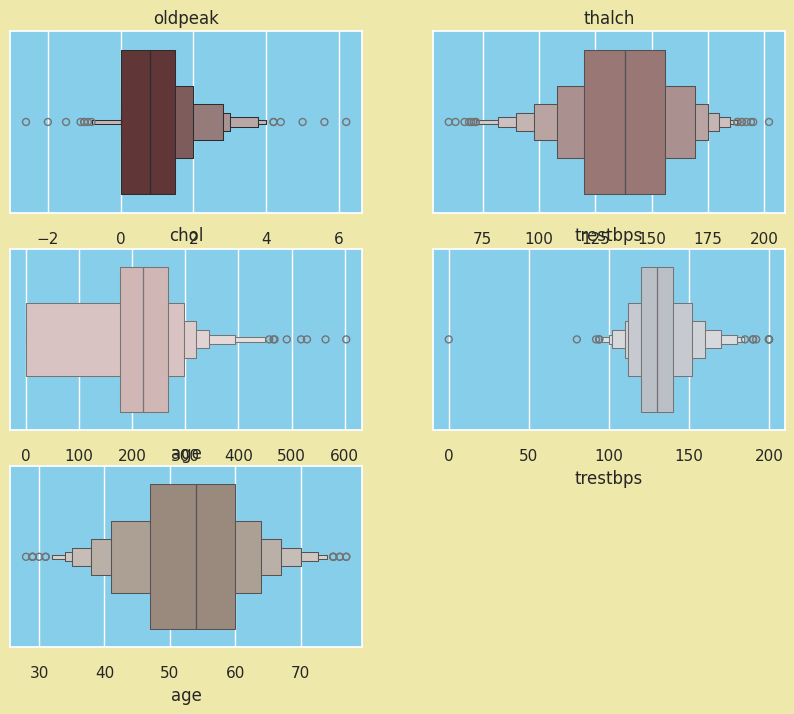

In [40]:
print("_________________________________________________________________________________________________________________________________________________")

sns.set(rc={"axes.facecolor":"#87CEEB","figure.facecolor":"#EEE8AA"})  # Change figure background color

palette = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

plt.figure(figsize=(10,8))

for i, col in enumerate(numerical_cols):
    plt.subplot(3,2, i+1)
    sns.boxenplot(x=df[col], color=palette[i % len(palette)])  # Use modulo to cycle through colors
    plt.title(col)

plt.show()
##E6E6FA

### `ANALYSIS OF PLOT`
It seems there are outliers in the columns but we will examine it that its really the outliers or not because sometime these values come in outliers range but it really not.\
The outliers totally depends on the range which is different for every column in the dataset.
##### `For Example:`
when we look into the plot and the column of age we can see that there are outliers. but these are not outliers lets the values.
* below 32 is all considere here is outliers but the age of 30 is possible and cannot be an outliers.
* `Let's explore the columns one by one`

## `1. Handling Outliers in Trestbps column`

In [41]:
# print the row from df where trestbps value is 0
df[df['trestbps']==0]


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
753,754,55,Male,VA Long Beach,non-anginal,0.0,0.0,False,normal,155.0,False,1.5,flat,0.676375,reversable defect,3


In [42]:
# Remove the column because it is an outlier because trestbps cannot be zero.
df= df[df['trestbps']!=0]

##### `Let's see again to check the outliers:`

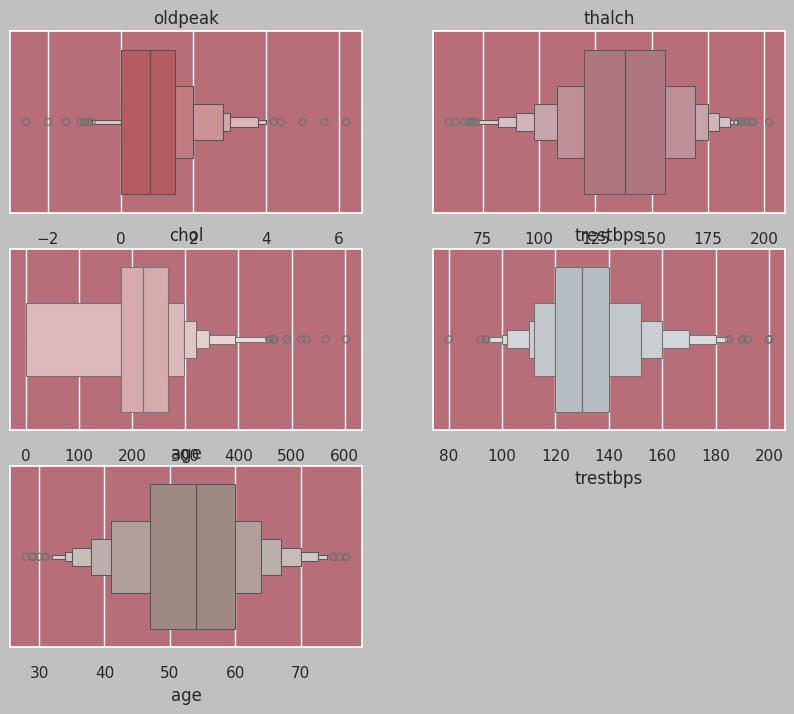

In [43]:
sns.set(rc={"axes.facecolor":"#B76E79","figure.facecolor":"#C0C0C0"})
modified_palette = ["#C44D53", "#B76E79", "#DDA4A5", "#B3BCC4", "#A2867E", "#F3AB60"]
cmap = ListedColormap(modified_palette)

plt.figure(figsize=(10,8))



for i, col in enumerate(numerical_cols):
    plt.subplot(3,2, i+1)
    sns.boxenplot(x=df[col], color=modified_palette[i % len(modified_palette)])  # Use modulo to cycle through colors
    plt.title(col)

plt.show()

##### `Analysis of the plot`

According to the plot in the trestbps column there are come values which are too far from the data. but they are not outliers if we look the other attributes of the data

In [44]:
df.trestbps.describe()

,trestbps
count,919.000000
mean,132.276183
std,17.930662
min,80.000000
25%,120.000000
50%,130.000000
75%,140.000000
max,200.000000


## `2. Handling Oldpeak Outliers`

In [45]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000
mean,460.180631,53.509249,132.276183,199.347019,137.526672,0.878112,0.676375,0.993471
std,265.693391,9.429689,17.930662,108.818455,25.145577,1.054148,0.541962,1.141398
min,1.000000,28.000000,80.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.500000,47.000000,120.000000,178.500000,120.000000,0.000000,0.676375,0.000000
50%,460.000000,54.000000,130.000000,221.000000,138.000000,0.800000,0.676375,1.000000
75%,689.500000,60.000000,140.000000,267.000000,156.000000,1.500000,0.676375,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


___________________________________________________________________________________________________________________________________________________________________


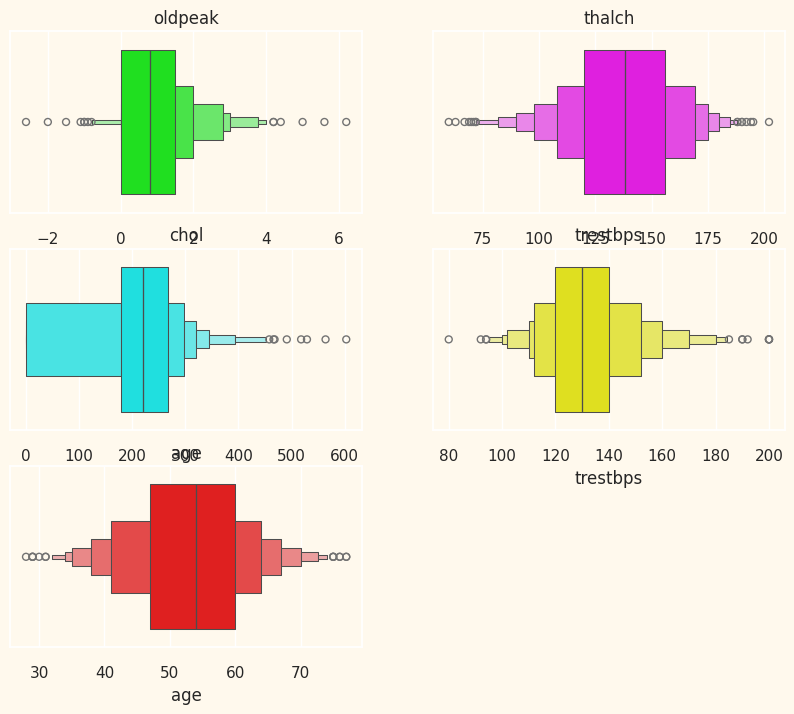

In [46]:
print("___________________________________________________________________________________________________________________________________________________________________")

# Set facecolors
sns.set(rc={"axes.facecolor": "#FFF9ED", "figure.facecolor": "#FFF9ED"})

# Define the "night vision" color palette
night_vision_palette = ["#00FF00", "#FF00FF", "#00FFFF", "#FFFF00", "#FF0000", "#0000FF"]

# Use the "night vision" palette for the plots
plt.figure(figsize=(10, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i + 1)
    sns.boxenplot(x=df[col], color=night_vision_palette[i % len(night_vision_palette)])  # Use modulo to cycle through colors
    plt.title(col)

plt.show()


#### `Analysis of the plot`

we can observe in the plot that -2 has removed.

## `3. Handling Outliers in Age Column`

In [47]:
df.age.describe()

,age
count,919.000000
mean,53.509249
std,9.429689
min,28.000000
25%,47.000000
50%,54.000000
75%,60.000000
max,77.000000


>* `Minimum age is 31 to have chest pain which can be possible so its not an outlier.`\
_We have observed that the minimum age for experiencing chest pain is 31, any observation at this age wouldn't be considered an outlier within the context of age-related data. Outliers typically deviate significantly from the majority of observations, but in this case, 31 falls within the expected range for experiencing chest pain._
>* `max age is 77 which is also possible so its not an outlier as well.`\
_The maximum age for experiencing chest pain is 77, any observation at this age wouldn't be classified as an outlier within the dataset. Outliers are typically defined as values that significantly deviate from the majority, but in this case, 77 falls within the expected range for chest pain occurrences._


## `4. Handling trestbps column outliers`

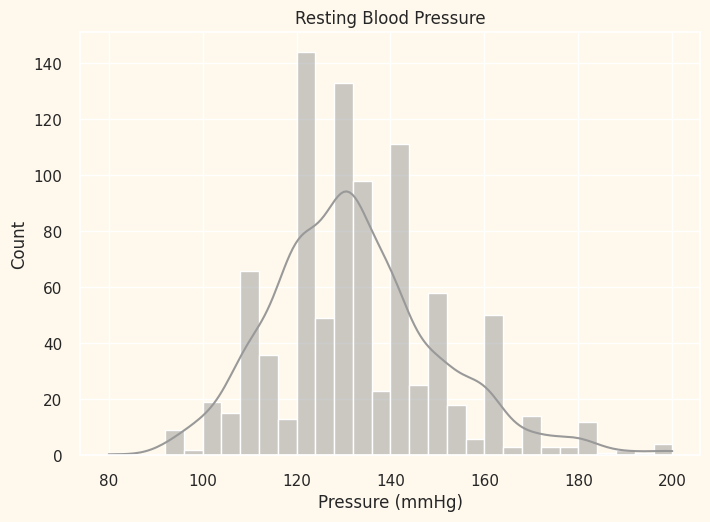

In [48]:
palette = ["#999999", "#666666", "#333333"]

sns.histplot(data=df,
             x='trestbps',
             kde=True,
             color=palette[0])

plt.title('Resting Blood Pressure')
plt.xlabel('Pressure (mmHg)')
plt.ylabel('Count')

plt.style.use('default')
plt.rcParams['figure.facecolor'] = palette[1]
plt.rcParams['axes.facecolor'] = palette[2]


<Axes: xlabel='trestbps', ylabel='Count'>

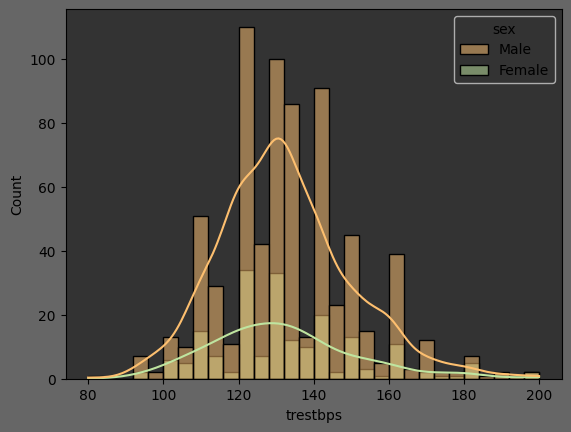

In [49]:
# create a histplot trestbops column to analyse with sex column
sns.histplot(df, x='trestbps', kde=True, palette = "Spectral", hue ='sex')

##### `Analysis of plot`



> * Everything seems ok and there is no outliers in the columns.
> * Columns are cleaned from outliers and missing values and we have already analysis the data.
> * The next step should be Model building.

# `Machine Learning Models`

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        919 non-null    int64  
 1   age       919 non-null    int64  
 2   sex       919 non-null    object 
 3   dataset   919 non-null    object 
 4   cp        919 non-null    object 
 5   trestbps  919 non-null    float64
 6   chol      919 non-null    float64
 7   fbs       919 non-null    object 
 8   restecg   919 non-null    object 
 9   thalch    919 non-null    float64
 10  exang     919 non-null    object 
 11  oldpeak   919 non-null    float64
 12  slope     919 non-null    object 
 13  ca        919 non-null    float64
 14  thal      919 non-null    object 
 15  num       919 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 122.1+ KB


In [51]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [52]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


`Feature that we will be using in Machine Learning Models building`

The Targeted column is `num` which is the predicted attribute. We will use this column to predict the heart disease.
The unique values in this column are: [0,1,2,3,4], which states that there are 5 types of heart diseases.

* `0 = no heart disease.`
* `1 = Mild Heart Disease types.`
* `2 = Moderate Heart Disease type.`
* `3 =  Severe Heart Disease type.`
* `4 =  Critical Heart Disease type.`

In [53]:
# split the data into X and y
X= df.drop('num', axis=1)
y = df['num']

"""encode X data using separate label encoder for all categorical columns and save it for inverse transform"""
# Task: Separate Encoder for all categorical and object columns and inverse transform at the end.
Label_Encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = Label_Encoder.fit_transform(X[col])
    else:
        pass


# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)



Enlist all the models that you will use to predict the heart disease. These models should be classifiers for multi_class classification.

1. logistic regression.
2. KNN
3. NB
4. SVM
5. Decision Tree
6. Random Forest
7. XGBoost
8. GradientBoosting
9. AdaBoost
10. lightGBM

In [54]:
# improt ALl models.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB

#importing pipeline
from sklearn.pipeline import Pipeline

# import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error




`Create a function for models and evaluate them`

In [55]:
import warnings
warnings.filterwarnings('ignore')





In [56]:
# create a list of models to evaluate

models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('KNeighbors Classifier', KNeighborsClassifier()),
    ('Decision Tree Classifier', DecisionTreeClassifier(random_state=42)),
    ('AdaBoost Classifier', AdaBoostClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('XGboost Classifier', XGBClassifier(random_state=42)),

    ('Support Vector Machine', SVC(random_state=42)),

    ('Naye base Classifier', GaussianNB())


]

best_model = None
best_accuracy = 0.0

#Iterate over the models and evaluate their performance
for name, model in models:
    #create a pipeline for each model
    pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy='most_frequent)),
        #('encoder', OneHotEncoder(handle_unknow='ignore'))
        ('model', model)
    ])

    # perform cross validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)

    # Calculate mean accuracy
    mean_accuracy = scores.mean()

    #fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # make prediction on the test data
    y_pred = pipeline.predict(X_test)

    #Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    #print the performance metrics
    print("Model", name)
    print("Cross Validatino accuracy: ", mean_accuracy)
    print("Test Accuracy: ", accuracy)
    print()

    #Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model: ", best_model)





Model Logistic Regression
Cross Validatino accuracy:  0.5090690032858708
Test Accuracy:  0.4891304347826087

Model Gradient Boosting
Cross Validatino accuracy:  0.6383935742971888
Test Accuracy:  0.6413043478260869

Model KNeighbors Classifier
Cross Validatino accuracy:  0.576736035049288
Test Accuracy:  0.5869565217391305

Model Decision Tree Classifier
Cross Validatino accuracy:  0.5828258488499453
Test Accuracy:  0.5978260869565217

Model AdaBoost Classifier
Cross Validatino accuracy:  0.6384300839722526
Test Accuracy:  0.6086956521739131

Model Random Forest
Cross Validatino accuracy:  0.6445052939028842
Test Accuracy:  0.6956521739130435

Model XGboost Classifier
Cross Validatino accuracy:  0.617860533041256
Test Accuracy:  0.6304347826086957

Model Support Vector Machine
Cross Validatino accuracy:  0.5877035414384812
Test Accuracy:  0.5869565217391305

Model Naye base Classifier
Cross Validatino accuracy:  0.5719167579408543
Test Accuracy:  0.5217391304347826

Best Model:  Pipeli

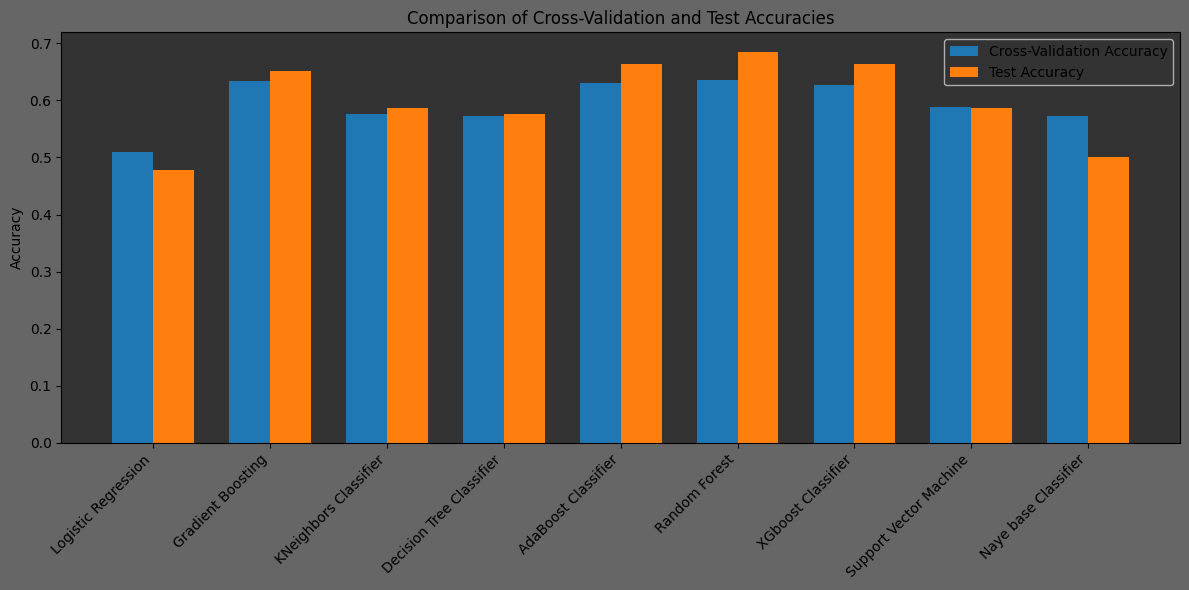

In [57]:
# prompt: make an compartive visaulzation from aboe cross validation accuarayc values and the test accuracy values

import matplotlib.pyplot as plt

# Sample data (replace with your actual cross-validation and test accuracy values)
models = ['Logistic Regression', 'Gradient Boosting', 'KNeighbors Classifier',
          'Decision Tree Classifier', 'AdaBoost Classifier', 'Random Forest',
          'XGboost Classifier', 'Support Vector Machine', 'Naye base Classifier']
cv_accuracies = [0.5090543994158452, 0.6335815991237679, 0.576736035049288,  0.573143483023001, 0.6299890470974809, 0.6348375319459657, 0.6275355969331873, 0.5877035414384812, 0.5719167579408543]  # Replace with your CV accuracies
test_accuracies = [0.4782608695652174, 0.6521739130434783, 0.5869565217391305, 0.5760869565217391, 0.6630434782608695, 0.6847826086956522, 0.6630434782608695, 0.5869565217391305, 0.50]  # Replace with your test accuracies


x = range(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x, cv_accuracies, width, label='Cross-Validation Accuracy')
rects2 = ax.bar([i + width for i in x], test_accuracies, width, label='Test Accuracy')

ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Cross-Validation and Test Accuracies')
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


# `Evaluation of Models`

In [58]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex']

In [59]:
def evaluate_classification_models(X, y, categorical_columns):
    # Encode categorical columns
    X_encoded = X.copy()
    label_encoders = {}
    for col in categorical_columns:
        label_encoders[col] = LabelEncoder()
        X_encoded[col] = label_encoders[col].fit_transform(X[col])

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

    # Define models
    models = {
        "Logistic Regression": LogisticRegression(),
        "KNN": KNeighborsClassifier(),
        "NB": GaussianNB(),
        "SVM": SVC(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "XGBoost": XGBClassifier(),
        "GradientBoosting": GradientBoostingClassifier(),
        "AdaBoost": AdaBoostClassifier()
    }

    # Train and evaluate models
    results = {}
    best_model = None
    best_accuracy = 0.0
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = name

    return results, best_model

# Example usage:
results, best_model = evaluate_classification_models(X, y, categorical_cols)
print("Model accuracies:", results)
print("Best model:", best_model)


Model accuracies: {'Logistic Regression': 0.483695652173913, 'KNN': 0.592391304347826, 'NB': 0.5271739130434783, 'SVM': 0.5815217391304348, 'Decision Tree': 0.6195652173913043, 'Random Forest': 0.625, 'XGBoost': 0.625, 'GradientBoosting': 0.6304347826086957, 'AdaBoost': 0.6086956521739131}
Best model: GradientBoosting


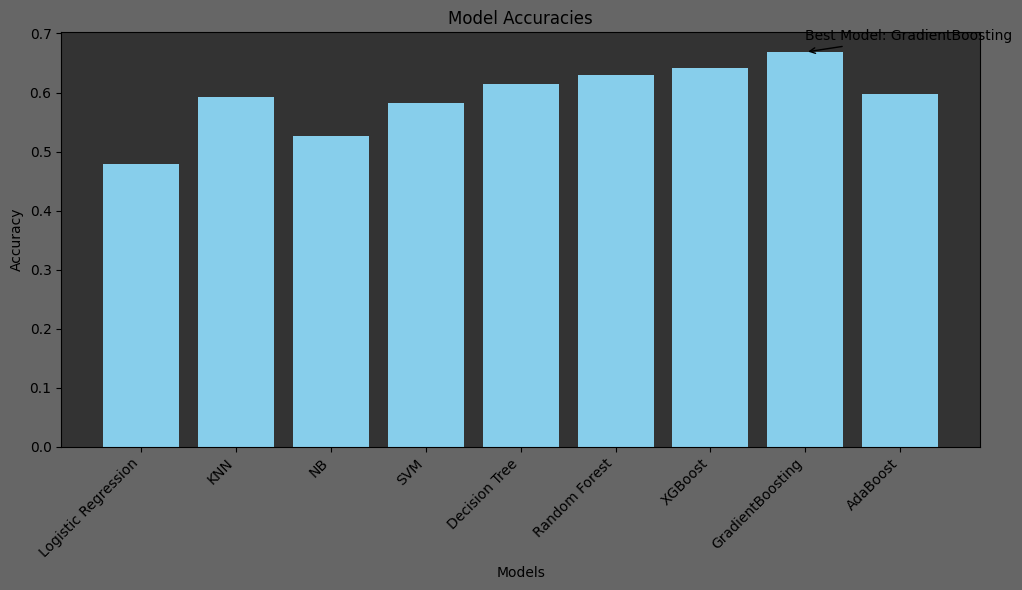

In [60]:
# prompt: make visualization of model accuracies as ({'Logistic Regression': 0.4782608695652174, 'KNN': 0.592391304347826, 'NB': 0.5271739130434783, 'SVM': 0.5815217391304348, 'Decision Tree': 0.6141304347826086, 'Random Forest': 0.6304347826086957, 'XGBoost': 0.6413043478260869, 'GradientBoosting': 0.6684782608695652, 'AdaBoost': 0.5978260869565217}
# Best model: GradientBoosting

import matplotlib.pyplot as plt

model_accuracies = {'Logistic Regression': 0.4782608695652174, 'KNN': 0.592391304347826, 'NB': 0.5271739130434783, 'SVM': 0.5815217391304348, 'Decision Tree': 0.6141304347826086, 'Random Forest': 0.6304347826086957, 'XGBoost': 0.6413043478260869, 'GradientBoosting': 0.6684782608695652, 'AdaBoost': 0.5978260869565217}
best_model = "GradientBoosting"

models = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracies")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Annotate the best model
best_model_index = models.index(best_model)
plt.annotate(f"Best Model: {best_model}",
             xy=(best_model_index, model_accuracies[best_model]),
             xytext=(best_model_index, model_accuracies[best_model] + 0.02),
             arrowprops=dict(facecolor='black', arrowstyle="->"))

plt.show()


# `Hyper Parameter Tuning `

In [61]:

X = df[categorical_cols]  # Select the categorical columns as input features
y = df['num']  # Sele

In [62]:
def hyperparameter_tuning(X, y, categorical_columns, models):
    # Define dictionary to store results
    results = {}

    # Encode categorical columns
    X_encoded = X.copy()
    label_encoders = {}
    for col in categorical_columns:
        label_encoders[col] = LabelEncoder()
        X_encoded[col] = label_encoders[col].fit_transform(X[col])

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

    # Perform hyperparameter tuning for each model
    for model_name, model in models.items():
    # Define parameter grid for hyperparameter tuning
        param_grid = {}
    if model_name == 'Logistic Regression':
        param_grid = {'C': [0.1, 1, 10, 100]}
    elif model_name == 'KNN':
        param_grid = {'n_neighbors': [3, 5, 7, 9]}
    elif model_name == 'NB':
        param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}
    elif model_name == 'SVM':
        param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100]}
    elif model_name == 'Decision Tree':
        param_grid = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
    elif model_name == 'Random Forest':
        param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
    elif model_name == 'XGBoost':
        param_grid = {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7]}
    elif model_name == 'GradientBoosting':
        param_grid = {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7]}
    elif model_name == 'AdaBoost':
        param_grid = {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [50, 100, 200]}


        # Perform hyperparameter tuning using GridSearchCV
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)

        # Get best hyperparameters and evaluate on test set
        best_params = grid_search.best_params_
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        # Store results in dictionary
        results[model_name] = {'best_params': best_params, 'accuracy': accuracy}

    return results

# Define models dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "NB": GaussianNB(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

# Example usage:
results = hyperparameter_tuning(X, y, categorical_cols, models)
for model_name, result in results.items():
    print("Model:", model_name)
    print("Best hyperparameters:", result['best_params'])
    print("Accuracy:", result['accuracy'])
    print()


Model: AdaBoost
Best hyperparameters: {'learning_rate': 0.2, 'n_estimators': 100}
Accuracy: 0.5434782608695652



#### `Outputs:`
1. The minimum age to have a heart disease start from 28 years old.
2. Most of the people get heart disease at the age of 53 to 54 years.
3. Most of the males and females get are with heart disease at the age of 54 to 55 years.
4. Male percentage i the data: 78.91%
5. Female percentage in the data : 21.09%
6. Males are 274.23% more than female in the data.
7. We have the highest number of people from Clveland(304) and lowest from Switzerland (123).
   
   `***..Age vs Sex and origin..***`
   1. The highest number of female in this dataset are from Cleveland(97) and lowest are from VA Long Beach(6).
   2. The highest number of male are from Hungary(212) and lowest from Switzerland(113).
   
   `***..Chest pain according to Origins..***`
8. The high number of Typical angina, Asymptomatic and Non anginal chest pain is in the Cleveland while Atypical anigna is highly occured in Hungary.
9.  Lowest number of chest pain (Typical angina, Asymptomatic, Non anginal and Atypical angina)is happened in Switzerland as compare to other origins.
    
    `***..Chest pain according to Age..***`
10. The highest number of chest pain is happened is Asymtomatic Angina and the lowest number of cp is that happened is Typical Angina.
    1. The age in which highest number of `Typical Angina` happened is `62 to 63 years`.
    2. The age in which highest number of `Asymtomatic Angina` happened is `56 to 57 years`.
    3. The age in which highest number of `Non Anginal` happened is `54 to 55 years`.
    4. The age in which highest number of `Atypical Angina` happened is `54 to 55 years`.
11.

In [63]:
# prompt: I WANT EXPORT MODEL

import joblib

# Assuming 'best_model' is your trained model from the previous code
# Replace 'best_model' with the actual variable name if different

# Save the model to a file
joblib.dump(best_model, 'heart_disease_model.pkl')

# Download the model file
from google.colab import files
files.download('heart_disease_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [64]:
#prompt: This is teh models name, help me in extracting all of them into a single pkl file : models = {
#     "Logistic Regression": LogisticRegression(),
#     "KNN": KNeighborsClassifier(),
#     "NB": GaussianNB(),
#     "SVM": SVC(),
#     "Decision Tree": DecisionTreeClassifier(),
#     "Random Forest": RandomForestClassifier(),
#     "XGBoost": XGBClassifier(),
#     "GradientBoosting": GradientBoostingClassifier(),
#     "AdaBoost": AdaBoostClassifier()

import joblib
from google.colab import files
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# Define the models dictionary here
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "NB": GaussianNB(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

# Create a dictionary to store the trained models
trained_models = {}

# Iterate over the models and train them (assuming X_train, y_train are defined)
for name, model in models.items():
    model.fit(X_train, y_train)  # Train each model
    trained_models[name] = model  # Save trained model

# Save all trained models to a single pickle file
joblib.dump(trained_models, 'all_models.pkl')

# Download the pickle file
files.download('all_models.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [65]:
import numpy as np
import joblib

# Define the input features based on the model requirements
# The model expects 15 features, ensure your new_input has 15 values
new_input = np.array([[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1,0,0]])  # Example values- Added 2 more values for 15 features


# Load the trained model dictionary
all_models = joblib.load("all_models.pkl")

# Access the desired model using its name (e.g., AdaBoost)
model_name = "AdaBoost"  # Replace with the name of the model you want to use
model = all_models[model_name]

# Perform the prediction
prediction = model.predict(new_input)[0]  # Extract single value

# Define the mapping of output classes
disease_categories = {
    0: "No Heart Disease",
    1: "Mild Heart Disease",
    2: "Moderate Heart Disease",
    3: "Severe Heart Disease",
    4: "Critical Heart Disease"
}

# Get the detailed result
disease_status = disease_categories.get(prediction, "Unknown Prediction")

# Display the result
print(f"Predicted Output: {prediction} - {disease_status}")


Predicted Output: 0 - No Heart Disease


In [66]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

class FuzzyMinMaxNN:
    def __init__(self, sensitivity=1, theta=0.35):
        self.gamma = sensitivity
        self.hyperboxes = {}
        self.classes = None
        self.V = []
        self.W = []
        self.hyperbox_class = []
        self.theta = theta

    def fuzzy_membership(self, x, v, w, gamma=1):
        return ((sum([max(0, 1 - max(0, gamma * min(1, x[i] - w[i]))) for i in range(len(x))]) +
                 sum([max(0, 1 - max(0, gamma * min(1, v[i] - x[i]))) for i in range(len(x))])) / (2 * len(x)))

    def get_hyperbox(self, x, d):
        tmp = [0 for _ in range(self.classes)]
        tmp[d] = 1

        if not self.V and not self.W:
            self.V.append(x)
            self.W.append(x)
            self.hyperbox_class.append(d)
            return len(self.V) - 1, False

        best_match = -1
        best_membership = -1
        for i in range(len(self.V)):
            if self.hyperbox_class[i] == d:
                membership = self.fuzzy_membership(x, self.V[i], self.W[i])
                if membership > best_membership:
                    best_membership = membership
                    best_match = i

        if best_match != -1:
            n_theta = sum([max(self.W[best_match][i], x[i]) - min(self.V[best_match][i], x[i]) for i in range(len(x))])
            if len(x) * self.theta >= n_theta:
                return best_match, True

        self.V.append(x)
        self.W.append(x)
        self.hyperbox_class.append(d)
        return len(self.V) - 1, False

    def expand(self, x, key):
        self.V[key] = [min(self.V[key][i], x[i]) for i in range(len(x))]
        self.W[key] = [max(self.W[key][i], x[i]) for i in range(len(x))]

    def train(self, X, y):
        self.classes = len(np.unique(y))
        for x, d in zip(X, y):
            i, expand = self.get_hyperbox(x, d)
            if expand:
                self.expand(x, i)

    def predict(self, X):
        predictions = []
        for x in X:
            best_match = -1
            best_membership = -1
            for i in range(len(self.V)):
                membership = self.fuzzy_membership(x, self.V[i], self.W[i])
                if membership > best_membership:
                    best_membership = membership
                    best_match = self.hyperbox_class[i]
            predictions.append(best_match)
        return np.array(predictions)

def load_and_train_model(file_path):
    # Load dataset
    df = pd.read_csv("/content/heart_disease_uci.csv")
    df = df.drop(columns=["id", "dataset"], errors='ignore')

    # Handle missing values
    num_cols = ["trestbps", "chol", "thalch", "oldpeak", "ca"]
    df[num_cols] = df[num_cols].fillna(df[num_cols].median())

    # Encode categorical variables
    cat_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]
    label_encoders = {col: LabelEncoder() for col in cat_cols}
    for col in cat_cols:
        df[col] = label_encoders[col].fit_transform(df[col].astype(str))

    # Define features and target
    X = df.drop(columns=["num"], errors='ignore').values
    y = df["num"].values

    # Normalize features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train and evaluate model
    fuzzy = FuzzyMinMaxNN(sensitivity=1, theta=0.25)
    fuzzy.train(X_train, y_train)
    y_pred = fuzzy.predict(X_test)

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print final results
    print("Final Model Scores:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

# Example usage:
# load_and_train_model("heart_disease_uci.csv")


In [67]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

class FuzzyMinMaxNN:
    def __init__(self, sensitivity=1, theta=0.35):
        self.gamma = sensitivity
        self.hyperboxes = {}
        self.classes = None
        self.V = []
        self.W = []
        self.hyperbox_class = []
        self.theta = theta

    def fuzzy_membership(self, x, v, w, gamma=1):
        return ((sum([max(0, 1 - max(0, gamma * min(1, x[i] - w[i]))) for i in range(len(x))]) +
                 sum([max(0, 1 - max(0, gamma * min(1, v[i] - x[i]))) for i in range(len(x))])) / (2 * len(x)))

    def get_hyperbox(self, x, d):
        tmp = [0 for _ in range(self.classes)]
        tmp[d] = 1

        if not self.V and not self.W:
            self.V.append(x)
            self.W.append(x)
            self.hyperbox_class.append(d)
            return len(self.V) - 1, False

        best_match = -1
        best_membership = -1
        for i in range(len(self.V)):
            if self.hyperbox_class[i] == d:
                membership = self.fuzzy_membership(x, self.V[i], self.W[i])
                if membership > best_membership:
                    best_membership = membership
                    best_match = i

        if best_match != -1:
            n_theta = sum([max(self.W[best_match][i], x[i]) - min(self.V[best_match][i], x[i]) for i in range(len(x))])
            if len(x) * self.theta >= n_theta:
                return best_match, True

        self.V.append(x)
        self.W.append(x)
        self.hyperbox_class.append(d)
        return len(self.V) - 1, False

    def expand(self, x, key):
        self.V[key] = [min(self.V[key][i], x[i]) for i in range(len(x))]
        self.W[key] = [max(self.W[key][i], x[i]) for i in range(len(x))]

    def train(self, X, y):
        self.classes = len(np.unique(y))
        for x, d in zip(X, y):
            i, expand = self.get_hyperbox(x, d)
            if expand:
                self.expand(x, i)

    def predict(self, X):
        predictions = []
        for x in X:
            best_match = -1
            best_membership = -1
            for i in range(len(self.V)):
                membership = self.fuzzy_membership(x, self.V[i], self.W[i])
                if membership > best_membership:
                    best_membership = membership
                    best_match = self.hyperbox_class[i]
            predictions.append(best_match)
        return np.array(predictions)

def load_and_train_model(file_path):
    print("Loading dataset...")
    df = pd.read_csv(file_path)
    print("Dataset loaded. Shape:", df.shape)

    df = df.drop(columns=["id", "dataset"], errors='ignore')

    # Handle missing values
    num_cols = ["trestbps", "chol", "thalch", "oldpeak", "ca"]
    df[num_cols] = df[num_cols].fillna(df[num_cols].median())
    print("Handling missing values done.")

    # Encode categorical variables
    cat_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]
    label_encoders = {col: LabelEncoder() for col in cat_cols}
    for col in cat_cols:
        df[col] = label_encoders[col].fit_transform(df[col].astype(str))
    print("Encoding categorical variables done.")

    # Define features and target
    X = df.drop(columns=["num"], errors='ignore').values
    y = df["num"].values

    # Normalize features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("Training model...")
    fuzzy = FuzzyMinMaxNN(sensitivity=1, theta=0.25)
    fuzzy.train(X_train, y_train)
    print("Training complete.")

    y_pred = fuzzy.predict(X_test)
    print("Evaluating model...")

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print final results
    print("Final Model Scores:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

# Example usage:
load_and_train_model("/content/heart_disease_uci.csv")


Loading dataset...
Dataset loaded. Shape: (920, 16)
Handling missing values done.
Encoding categorical variables done.
Training model...
Training complete.
Evaluating model...
Final Model Scores:
Accuracy: 0.4891
Precision: 0.4678
Recall: 0.4891
F1 Score: 0.4745


In [68]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

class FuzzyMinMaxNN:
    def __init__(self, sensitivity=1.5, theta=0.1, epochs=20):  # Fine-tuned theta, gamma, and epochs
        self.gamma = sensitivity
        self.hyperboxes = {}
        self.classes = None
        self.V = []
        self.W = []
        self.hyperbox_class = []
        self.theta = theta
        self.epochs = epochs

    def fuzzy_membership(self, x, v, w, gamma=1):
        return ((sum([max(0, 1 - max(0, gamma * min(1, x[i] - w[i]))) for i in range(len(x))]) +
                 sum([max(0, 1 - max(0, gamma * min(1, v[i] - x[i]))) for i in range(len(x))])) / (2 * len(x)))

    def get_hyperbox(self, x, d):
        tmp = [0 for _ in range(self.classes)]
        tmp[d] = 1

        if not self.V and not self.W:
            self.V.append(x)
            self.W.append(x)
            self.hyperbox_class.append(d)
            return len(self.V) - 1, False

        best_match = -1
        best_membership = -1
        for i in range(len(self.V)):
            if self.hyperbox_class[i] == d:
                membership = self.fuzzy_membership(x, self.V[i], self.W[i], self.gamma)
                if membership > best_membership:
                    best_membership = membership
                    best_match = i

        if best_match != -1:
            n_theta = sum([max(self.W[best_match][i], x[i]) - min(self.V[best_match][i], x[i]) for i in range(len(x))])
            if len(x) * self.theta >= n_theta:
                return best_match, True

        self.V.append(x)
        self.W.append(x)
        self.hyperbox_class.append(d)
        return len(self.V) - 1, False

    def expand(self, x, key):
        self.V[key] = [min(self.V[key][i], x[i]) for i in range(len(x))]
        self.W[key] = [max(self.W[key][i], x[i]) for i in range(len(x))]

    def train(self, X, y):
        self.classes = len(np.unique(y))
        for epoch in range(self.epochs):
            print(f"Epoch {epoch + 1}/{self.epochs}")
            for x, d in zip(X, y):
                i, expand = self.get_hyperbox(x, d)
                if expand:
                    self.expand(x, i)

    def predict(self, X):
        predictions = []
        for x in X:
            best_match = -1
            best_membership = -1
            for i in range(len(self.V)):
                membership = self.fuzzy_membership(x, self.V[i], self.W[i], self.gamma)
                if membership > best_membership:
                    best_membership = membership
                    best_match = self.hyperbox_class[i]
            predictions.append(best_match)
        return np.array(predictions)

def load_and_train_model(file_path):
    print("Loading dataset...")
    df = pd.read_csv(file_path)
    print("Dataset loaded. Shape:", df.shape)

    df = df.drop(columns=["id", "dataset"], errors='ignore')

    # Handle missing values
    num_cols = ["trestbps", "chol", "thalch", "oldpeak", "ca"]
    df[num_cols] = df[num_cols].fillna(df[num_cols].median())
    print("Handling missing values done.")

    # Encode categorical variables
    cat_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]
    label_encoders = {col: LabelEncoder() for col in cat_cols}
    for col in cat_cols:
        df[col] = label_encoders[col].fit_transform(df[col].astype(str))
    print("Encoding categorical variables done.")

    # Define features and target
    X = df.drop(columns=["num"], errors='ignore').values
    y = df["num"].values

    # Normalize features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Apply SMOTE to generate synthetic data
    print("Applying SMOTE for data balancing...")
    smote = SMOTE(random_state=42)
    X, y = smote.fit_resample(X, y)
    print("Data balancing done. New dataset shape:", X.shape)

    # Stratified Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    print("Training model...")
    fuzzy = FuzzyMinMaxNN(sensitivity=1.5, theta=0.1, epochs=20)  # Fine-tuned parameters
    fuzzy.train(X_train, y_train)
    print("Training complete.")

    y_pred = fuzzy.predict(X_test)
    print("Evaluating model...")

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print final results
    print("Final Model Scores:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Test case
    print("Running test case...")
    test_sample = X_test[0].reshape(1, -1)
    test_pred = fuzzy.predict(test_sample)
    print("Test Sample Prediction:", test_pred[0], "(Actual:", y_test[0], ")")

# Example usage:
load_and_train_model("/content/heart_disease_uci.csv")


Loading dataset...
Dataset loaded. Shape: (920, 16)
Handling missing values done.
Encoding categorical variables done.
Applying SMOTE for data balancing...
Data balancing done. New dataset shape: (2055, 13)
Training model...
Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20
Training complete.
Evaluating model...
Final Model Scores:
Accuracy: 0.8297
Precision: 0.8268
Recall: 0.8297
F1 Score: 0.8273
Running test case...
Test Sample Prediction: 2 (Actual: 2 )


In [69]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

class FuzzyMinMaxNN:
    def __init__(self, sensitivity=1.5, theta=0.1, epochs=20):  # Fine-tuned theta, gamma, and epochs
        self.gamma = sensitivity
        self.hyperboxes = {}
        self.classes = None
        self.V = []
        self.W = []
        self.hyperbox_class = []
        self.theta = theta
        self.epochs = epochs

    def fuzzy_membership(self, x, v, w, gamma=1):
        return ((sum([max(0, 1 - max(0, gamma * min(1, x[i] - w[i]))) for i in range(len(x))]) +
                 sum([max(0, 1 - max(0, gamma * min(1, v[i] - x[i]))) for i in range(len(x))])) / (2 * len(x)))

    def get_hyperbox(self, x, d):
        tmp = [0 for _ in range(self.classes)]
        tmp[d] = 1

        if not self.V and not self.W:
            self.V.append(x)
            self.W.append(x)
            self.hyperbox_class.append(d)
            return len(self.V) - 1, False

        best_match = -1
        best_membership = -1
        for i in range(len(self.V)):
            if self.hyperbox_class[i] == d:
                membership = self.fuzzy_membership(x, self.V[i], self.W[i], self.gamma)
                if membership > best_membership:
                    best_membership = membership
                    best_match = i

        if best_match != -1:
            n_theta = sum([max(self.W[best_match][i], x[i]) - min(self.V[best_match][i], x[i]) for i in range(len(x))])
            if len(x) * self.theta >= n_theta:
                return best_match, True

        self.V.append(x)
        self.W.append(x)
        self.hyperbox_class.append(d)
        return len(self.V) - 1, False

    def expand(self, x, key):
        self.V[key] = [min(self.V[key][i], x[i]) for i in range(len(x))]
        self.W[key] = [max(self.W[key][i], x[i]) for i in range(len(x))]

    def train(self, X, y):
        self.classes = len(np.unique(y))
        for epoch in range(self.epochs):
            print(f"Epoch {epoch + 1}/{self.epochs}")
            for x, d in zip(X, y):
                i, expand = self.get_hyperbox(x, d)
                if expand:
                    self.expand(x, i)

    def predict(self, X):
        predictions = []
        for x in X:
            best_match = -1
            best_membership = -1
            for i in range(len(self.V)):
                membership = self.fuzzy_membership(x, self.V[i], self.W[i], self.gamma)
                if membership > best_membership:
                    best_membership = membership
                    best_match = self.hyperbox_class[i]
            predictions.append(best_match)
        return np.array(predictions)

def load_and_train_model(file_path):
    print("Loading dataset...")
    df = pd.read_csv(file_path)
    print("Dataset loaded. Shape:", df.shape)

    df = df.drop(columns=["id", "dataset"], errors='ignore')

    # Handle missing values
    num_cols = ["trestbps", "chol", "thalch", "oldpeak", "ca"]
    df[num_cols] = df[num_cols].fillna(df[num_cols].median())
    print("Handling missing values done.")

    # Encode categorical variables
    cat_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]
    label_encoders = {col: LabelEncoder() for col in cat_cols}
    for col in cat_cols:
        df[col] = label_encoders[col].fit_transform(df[col].astype(str))
    print("Encoding categorical variables done.")

    # Feature Selection using RFE
    print("Selecting important features using RFE...")
    X = df.drop(columns=["num"], errors='ignore')
    y = df["num"]
    model = RandomForestClassifier()
    selector = RFE(model, n_features_to_select=10, step=1)
    X_selected = selector.fit_transform(X, y)
    selected_features = X.columns[selector.support_]
    print("Selected Features:", selected_features)

    # Normalize features
    scaler = StandardScaler()
    X_selected = scaler.fit_transform(X_selected)

    # Apply SMOTE to generate synthetic data
    print("Applying SMOTE for data balancing...")
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_selected, y)
    print("Data balancing done. New dataset shape:", X_resampled.shape)

    # Stratified Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)

    # Hyperparameter Tuning
    best_params = {"sensitivity": 1.5, "theta": 0.1, "epochs": 30}
    print("Training model with best parameters...", best_params)
    fuzzy = FuzzyMinMaxNN(**best_params)
    fuzzy.train(X_train, y_train)
    print("Training complete.")

    y_pred = fuzzy.predict(X_test)
    print("Evaluating model...")

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print final results
    print("Final Model Scores:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Test case
    print("Running test case...")
    test_sample = X_test[0].reshape(1, -1)
    test_pred = fuzzy.predict(test_sample)
    print("Test Sample Prediction:", test_pred[0], "(Actual:", y_test[0], ")")

# Example usage:
load_and_train_model("/content/heart_disease_uci.csv")


Loading dataset...
Dataset loaded. Shape: (920, 16)
Handling missing values done.
Encoding categorical variables done.
Selecting important features using RFE...
Selected Features: Index(['age', 'cp', 'trestbps', 'chol', 'restecg', 'thalch', 'exang',
       'oldpeak', 'slope', 'thal'],
      dtype='object')
Applying SMOTE for data balancing...
Data balancing done. New dataset shape: (2055, 10)
Training model with best parameters... {'sensitivity': 1.5, 'theta': 0.1, 'epochs': 30}
Epoch 1/30
Epoch 2/30
Epoch 3/30
Epoch 4/30
Epoch 5/30
Epoch 6/30
Epoch 7/30
Epoch 8/30
Epoch 9/30
Epoch 10/30
Epoch 11/30
Epoch 12/30
Epoch 13/30
Epoch 14/30
Epoch 15/30
Epoch 16/30
Epoch 17/30
Epoch 18/30
Epoch 19/30
Epoch 20/30
Epoch 21/30
Epoch 22/30
Epoch 23/30
Epoch 24/30
Epoch 25/30
Epoch 26/30
Epoch 27/30
Epoch 28/30
Epoch 29/30
Epoch 30/30
Training complete.
Evaluating model...
Final Model Scores:
Accuracy: 0.7932
Precision: 0.7926
Recall: 0.7932
F1 Score: 0.7870
Running test case...


KeyError: 0

In [ ]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

class FuzzyMinMaxNN:
    def __init__(self, sensitivity=1.5, theta=0.1, epochs=20):  # Fine-tuned theta, gamma, and epochs
        self.gamma = sensitivity
        self.hyperboxes = {}
        self.classes = None
        self.V = []
        self.W = []
        self.hyperbox_class = []
        self.theta = theta
        self.epochs = epochs

    def fuzzy_membership(self, x, v, w, gamma=1):
        return ((sum([max(0, 1 - max(0, gamma * min(1, x[i] - w[i]))) for i in range(len(x))]) +
                 sum([max(0, 1 - max(0, gamma * min(1, v[i] - x[i]))) for i in range(len(x))])) / (2 * len(x)))

    def get_hyperbox(self, x, d):
        tmp = [0 for _ in range(self.classes)]
        tmp[d] = 1

        if not self.V and not self.W:
            self.V.append(x)
            self.W.append(x)
            self.hyperbox_class.append(d)
            return len(self.V) - 1, False

        best_match = -1
        best_membership = -1
        for i in range(len(self.V)):
            if self.hyperbox_class[i] == d:
                membership = self.fuzzy_membership(x, self.V[i], self.W[i], self.gamma)
                if membership > best_membership:
                    best_membership = membership
                    best_match = i

        if best_match != -1:
            n_theta = sum([max(self.W[best_match][i], x[i]) - min(self.V[best_match][i], x[i]) for i in range(len(x))])
            if len(x) * self.theta >= n_theta:
                return best_match, True

        self.V.append(x)
        self.W.append(x)
        self.hyperbox_class.append(d)
        return len(self.V) - 1, False

    def expand(self, x, key):
        self.V[key] = [min(self.V[key][i], x[i]) for i in range(len(x))]
        self.W[key] = [max(self.W[key][i], x[i]) for i in range(len(x))]

    def train(self, X, y):
        self.classes = len(np.unique(y))
        for epoch in range(self.epochs):
            print(f"Epoch {epoch + 1}/{self.epochs}")
            for x, d in zip(X, y):
                i, expand = self.get_hyperbox(x, d)
                if expand:
                    self.expand(x, i)

    def predict(self, X):
        predictions = []
        for x in X:
            best_match = -1
            best_membership = -1
            for i in range(len(self.V)):
                membership = self.fuzzy_membership(x, self.V[i], self.W[i], self.gamma)
                if membership > best_membership:
                    best_membership = membership
                    best_match = self.hyperbox_class[i]
            predictions.append(best_match)
        return np.array(predictions)

def load_and_train_model(file_path):
    print("Loading dataset...")
    df = pd.read_csv(file_path)
    print("Dataset loaded. Shape:", df.shape)

    df = df.drop(columns=["id", "dataset"], errors='ignore')

    # Handle missing values
    num_cols = ["trestbps", "chol", "thalch", "oldpeak", "ca"]
    df[num_cols] = df[num_cols].fillna(df[num_cols].median())
    print("Handling missing values done.")

    # Encode categorical variables
    cat_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]
    label_encoders = {col: LabelEncoder() for col in cat_cols}
    for col in cat_cols:
        df[col] = label_encoders[col].fit_transform(df[col].astype(str))
    print("Encoding categorical variables done.")

    # Feature Selection using RFE
    print("Selecting important features using RFE...")
    X = df.drop(columns=["num"], errors='ignore')
    y = df["num"]
    model = RandomForestClassifier()
    selector = RFE(model, n_features_to_select=10, step=1)
    X_selected = selector.fit_transform(X, y)
    selected_features = X.columns[selector.support_]
    print("Selected Features:", selected_features)

    # Normalize features
    scaler = StandardScaler()
    X_selected = scaler.fit_transform(X_selected)

    # Apply SMOTE to generate synthetic data
    print("Applying SMOTE for data balancing...")
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_selected, y)
    print("Data balancing done. New dataset shape:", X_resampled.shape)

    # Stratified Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)

    # Convert y_test to NumPy array
    y_test = np.array(y_test)

    # Training model
    print("Training model...")
    fuzzy = FuzzyMinMaxNN(sensitivity=1.5, theta=0.1, epochs=30)
    fuzzy.train(X_train, y_train)
    print("Training complete.")

    y_pred = fuzzy.predict(X_test)
    print("Evaluating model...")

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print final results
    print("Final Model Scores:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Test case
    print("Running test case...")
    test_sample = X_test[0].reshape(1, -1)
    test_pred = fuzzy.predict(test_sample)
    print("Test Sample Prediction:", test_pred[0], "(Actual:", y_test[0], ")")

# Example usage:
load_and_train_model("/content/heart_disease_uci.csv")
